In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\abhay\\Downloads\\diabetes.csv")
print("Shape : ",df.shape)
df.head()

Shape :  (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

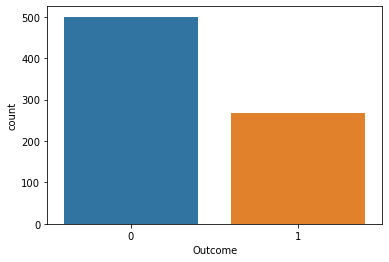

In [2]:
# 1->diabetic
# 0->Healthy
import matplotlib.pyplot as plt
import seaborn as sns

print(df['Outcome'].value_counts())
sns.countplot(x = "Outcome",data = df)

In [3]:
#no of null entry

df.isnull().sum().sum()

0

In [4]:
#no of entry whose value is 0

print("total number of rows : ",len(df))
print("Pregnancies : ",(len(df.loc[df['Pregnancies'] == 0])))
print("Glucose : ",(len(df.loc[df['Glucose'] == 0])))
print("BloodPressure : ",(len(df.loc[df['BloodPressure'] == 0])))
print("SkinThickness : ",(len(df.loc[df['SkinThickness'] == 0])))
print("Insulin : ",(len(df.loc[df['Insulin'] == 0])))
print("BMI : ",(len(df.loc[df['BMI'] == 0])))
print("DiabetesPedigreeFunction : ",(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("Age : ",(len(df.loc[df['Age'] == 0])))

total number of rows :  768
Pregnancies :  111
Glucose :  5
BloodPressure :  35
SkinThickness :  227
Insulin :  374
BMI :  11
DiabetesPedigreeFunction :  0
Age :  0


In [5]:
df['Glucose'].replace(to_replace = 0, value = df['Glucose'].mean(), inplace=True)
df['BloodPressure'].replace(to_replace = 0, value = df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].replace(to_replace = 0, value = df['SkinThickness'].mean(), inplace=True)
df['Insulin'].replace(to_replace = 0, value = df['Insulin'].mean(), inplace=True)
df['BMI'].replace(to_replace = 0, value = df['BMI'].mean(), inplace=True)
df['DiabetesPedigreeFunction'].replace(to_replace = 0, value = df['DiabetesPedigreeFunction'].mean(), inplace=True)
df['Age'].replace(to_replace = 0, value = df['Age'].mean(), inplace=True)

In [6]:
print("total number of rows : ",len(df))
print("Pregnancies : ",(len(df.loc[df['Pregnancies'] == 0])))
print("Glucose : ",(len(df.loc[df['Glucose'] == 0])))
print("BloodPressure : ",(len(df.loc[df['BloodPressure'] == 0])))
print("SkinThickness : ",(len(df.loc[df['SkinThickness'] == 0])))
print("Insulin : ",(len(df.loc[df['Insulin'] == 0])))
print("BMI : ",(len(df.loc[df['BMI'] == 0])))
print("DiabetesPedigreeFunction : ",(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("Age : ",(len(df.loc[df['Age'] == 0])))

total number of rows :  768
Pregnancies :  111
Glucose :  0
BloodPressure :  0
SkinThickness :  0
Insulin :  0
BMI :  0
DiabetesPedigreeFunction :  0
Age :  0


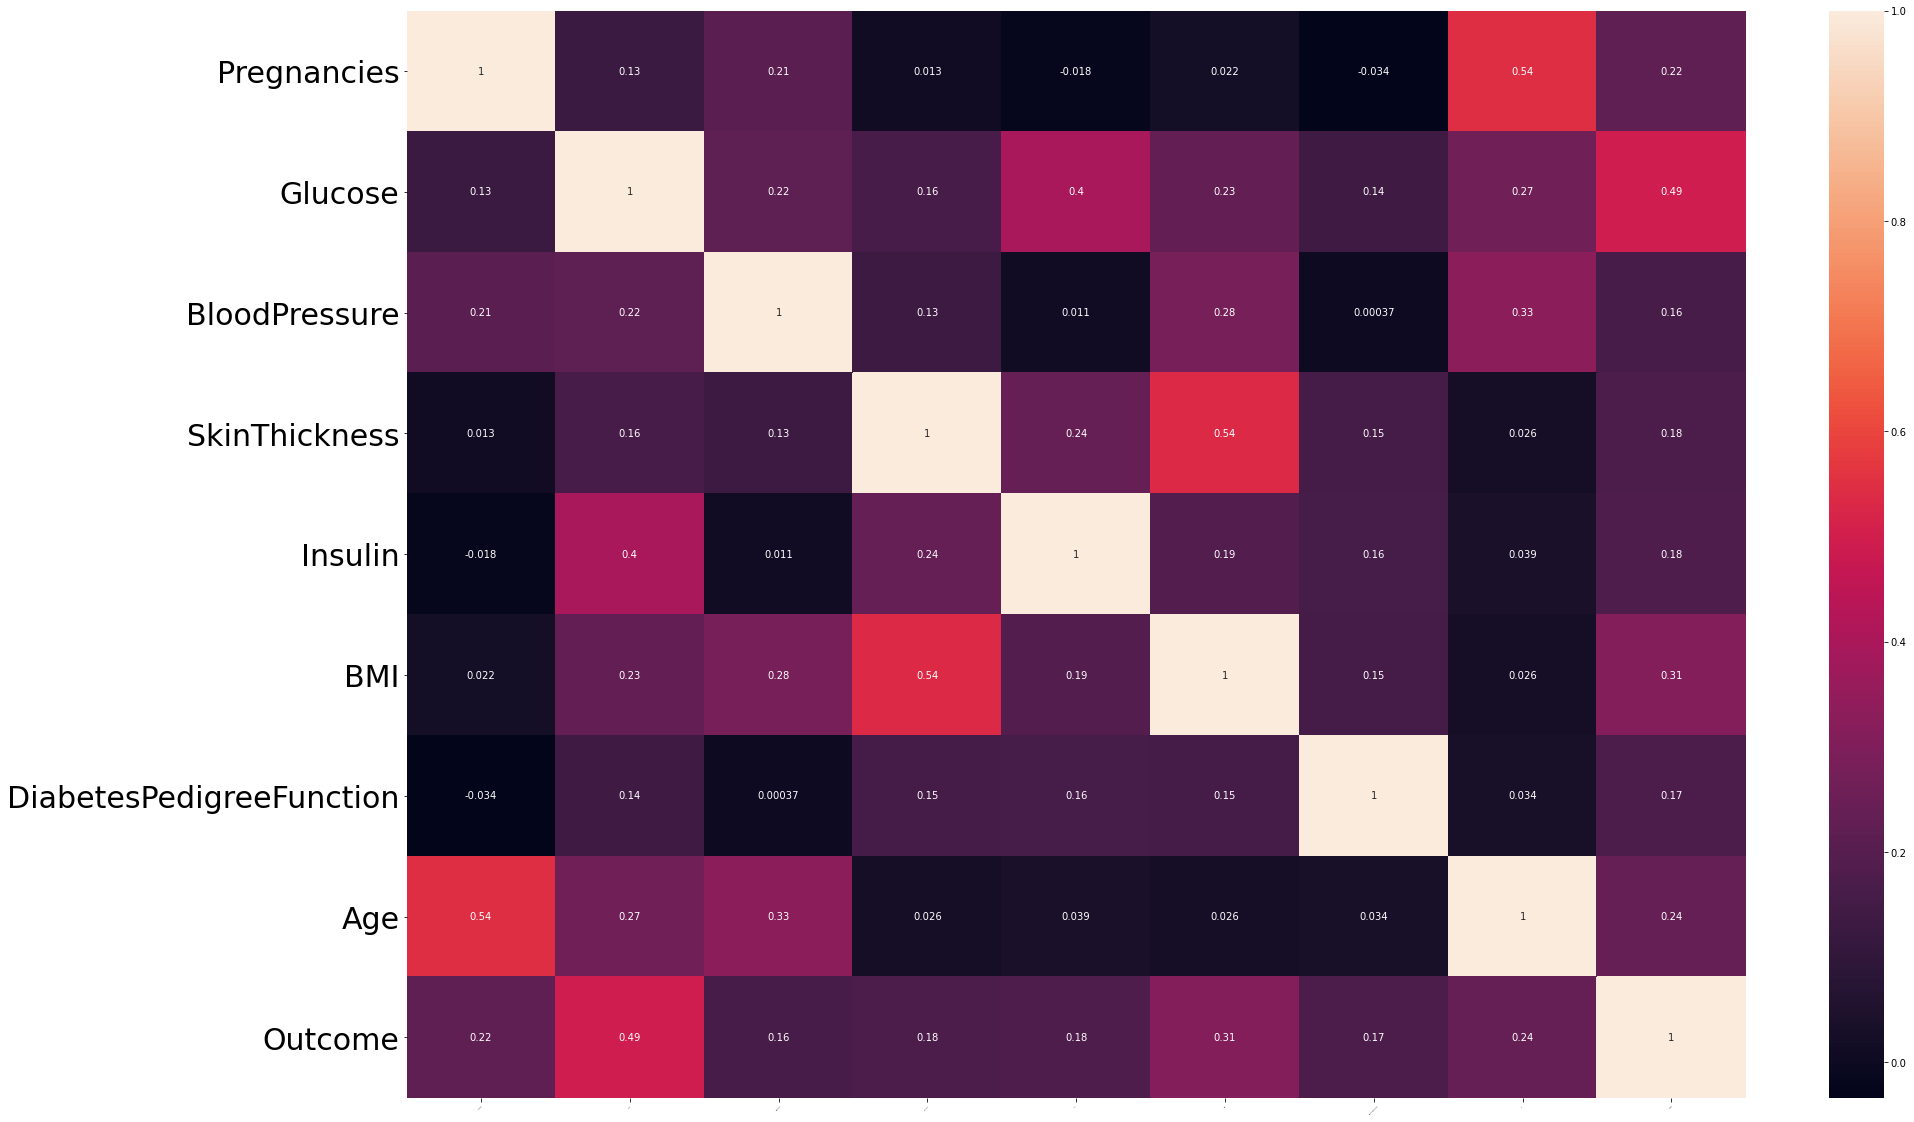

In [7]:
#corelation between the matrix
corrmat = df.corr()
top_corr_features = corrmat.index
#plt.xticks(range(df.shape[1]),df.columns,fontsize = 34,rotation = 45)
#plt.yticks(range(df.shape[1]),df.columns,fontsize = 34)
plt.figure(figsize = (30,20))
plt.xticks(range(df.shape[1]),df.columns,fontsize = 0,rotation = 45)
plt.yticks(range(df.shape[1]),df.columns,fontsize = 30)
g = sns.heatmap(df[top_corr_features].corr(),annot = True)

In [8]:
#inside a system
def direct_output(df):
    X = df.drop(['Outcome'], axis=1)
    Y = df['Outcome']
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X)
    standardized_data = scaler.transform(X)
    
    X = standardized_data
    Y = df['Outcome']
    
    from sklearn.model_selection import train_test_split
    #stratify preserves the same proportions of examples in each class as observed in the original dataset.
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
    
    print(X.shape, X_train.shape, X_test.shape)
    
    return (X_train,Y_train,X_test,Y_test)

    
    
    

In [9]:
def svm_model(X_train,Y_train,X_test,Y_test):
    from sklearn import svm
    classifier = svm.SVC(kernel='linear')
    classifier.fit(X_train, Y_train)
    
    from sklearn.metrics import accuracy_score
    X_train_prediction = classifier.predict(X_train)
    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
    
    print('Accuracy score of the training data : ', training_data_accuracy)
    
    # accuracy score on the test data
    X_test_prediction = classifier.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    
    print('Accuracy score of the test data : ', test_data_accuracy)
    
    from sklearn.metrics import classification_report
    print(classification_report(Y_test,X_test_prediction))
    return classifier
    #here the f1 score of the having diabetic is very low. so i have to increase the f1 score.and if the dataset is imbalance then
    # the accuarcy is kind of useless so the prediction should be dependent on the f1 score .so now we will balance the dataset and check
    #the accuracy.

In [10]:
def ann(X_train,Y_train,X_test,Y_test):
    import tensorflow as tf
    from tensorflow import keras


    model = keras.Sequential([
        keras.layers.Dense(8, input_shape=(8,), activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    # opt = keras.optimizers.Adam(learning_rate=0.01)

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, Y_train, epochs=100)
    model.evaluate(X_test, Y_test)
    yp = model.predict(X_test)
    y_pred = []
    for element in yp:
        if element > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    from sklearn.metrics import confusion_matrix , classification_report

    print(classification_report(Y_test,y_pred))
    return y_pred

In [11]:
#without undersampling and oversampling using svm
normal = direct_output(df)
svm_model(normal[0],normal[1],normal[2],normal[3])


(768, 8) (614, 8) (154, 8)
Accuracy score of the training data :  0.7801302931596091
Accuracy score of the test data :  0.7792207792207793
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.54      0.63        54

    accuracy                           0.78       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.78      0.78      0.77       154



SVC(kernel='linear')

In [12]:
ann(normal[0],normal[1],normal[2],normal[3])

Epoch 1/100
20/20 [==============================] - 3s 3ms/step - loss: 0.6662 - accuracy: 0.6156
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6384 - accuracy: 0.6384
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6146 - accuracy: 0.6564
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5942 - accuracy: 0.6645
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.6889
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7150
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.7264
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.7410
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.7492
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5198 - accuracy: 0.7541
Epoch 11/

20/20 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8013
Epoch 84/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.8029
Epoch 85/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8013
Epoch 86/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4091 - accuracy: 0.8029
Epoch 87/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4097 - accuracy: 0.7997
Epoch 88/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4080 - accuracy: 0.8013
Epoch 89/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4071 - accuracy: 0.8013
Epoch 90/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8029
Epoch 91/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8013
Epoch 92/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8062
Epoch 93/100


[0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0]

In [13]:
#undersampling

count_class_0 ,count_class_1 = df.Outcome.value_counts()
df_class_0 = df[df['Outcome']==0]
df_class_1 = df[df['Outcome']==1]

print(df_class_0.shape,df_class_1.shape)

(500, 9) (268, 9)


In [14]:
df_class_0_under = df_class_0.sample(268)
df_class_0_under.shape

(268, 9)

In [15]:
df_test_under = pd.concat([df_class_0_under,df_class_1],axis = 0)
df_test_under.shape

(536, 9)

In [16]:
under_sampling = direct_output(df_test_under)
svm_model(under_sampling[0],under_sampling[1],under_sampling[2],under_sampling[3])

(536, 8) (428, 8) (108, 8)
Accuracy score of the training data :  0.7780373831775701
Accuracy score of the test data :  0.7592592592592593
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        54
           1       0.80      0.69      0.74        54

    accuracy                           0.76       108
   macro avg       0.77      0.76      0.76       108
weighted avg       0.77      0.76      0.76       108



SVC(kernel='linear')

In [17]:
ann(under_sampling[0],under_sampling[1],under_sampling[2],under_sampling[3])

Epoch 1/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7688 - accuracy: 0.5070
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7296 - accuracy: 0.5187
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7014 - accuracy: 0.5350
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.5771
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.6051
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6402 - accuracy: 0.6379
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6244 - accuracy: 0.6542
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6095 - accuracy: 0.6729
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.6822
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5828 - accuracy: 0.6963
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.4062 - accuracy: 0.8154
Epoch 84/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4055 - accuracy: 0.8131
Epoch 85/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4047 - accuracy: 0.8061
Epoch 86/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4041 - accuracy: 0.8107
Epoch 87/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.8107
Epoch 88/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4026 - accuracy: 0.8131
Epoch 89/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4022 - accuracy: 0.8084
Epoch 90/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4023 - accuracy: 0.8131
Epoch 91/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4008 - accuracy: 0.8178
Epoch 92/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4000 - accuracy: 0.8107
Epoch 93/100


[1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1]

In [18]:
#oversampling
df_class_1_under = df_class_1.sample(500,replace = True)
df_class_1_under.shape

(500, 9)

In [19]:
df_test_over = pd.concat([df_class_1_under,df_class_0],axis = 0)
df_test_over.shape

(1000, 9)

In [20]:
over_sampling = direct_output(df_test_over)
svm_model(over_sampling[0],over_sampling[1],over_sampling[2],over_sampling[3])

(1000, 8) (800, 8) (200, 8)
Accuracy score of the training data :  0.76
Accuracy score of the test data :  0.73
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       100
           1       0.77      0.66      0.71       100

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



SVC(kernel='linear')

In [21]:

kw = ann(over_sampling[0],over_sampling[1],over_sampling[2],over_sampling[3])

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.5562
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.6187
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.6500
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.6975
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5850 - accuracy: 0.7200
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5591 - accuracy: 0.7225
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7188
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7287
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7475
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7525
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8188
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8175
Epoch 85/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8200
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8225
Epoch 87/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8238
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8238
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8288
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8300
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8250
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8288
Epoch 93/100


Text(69.0, 0.5, 'Truth')

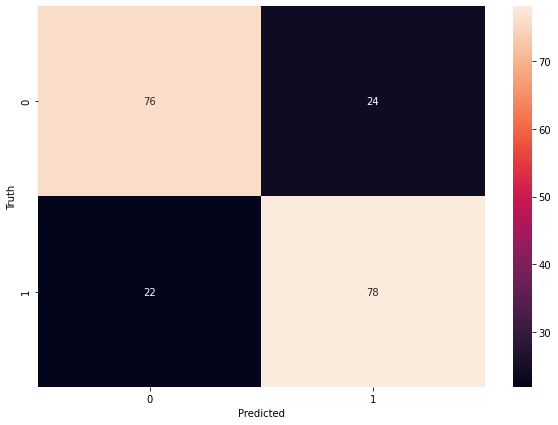

In [22]:
import seaborn as sn
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=over_sampling[3],predictions=kw)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
classifier = svm_model(normal[0],normal[1],normal[2],normal[3])
import numpy as np
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(input_data_reshaped)
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

Accuracy score of the training data :  0.7801302931596091
Accuracy score of the test data :  0.7792207792207793
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.54      0.63        54

    accuracy                           0.78       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.78      0.78      0.77       154

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[0]
The person is not diabetic
